In [1]:
import pandas as pd
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('figure', dpi=600)

## AV percentage

In [2]:
df = pd.read_csv('trial_data/av_perc.csv', index_col=False)
df

,av_p,delay_mn,delay_sd
0,0.0,1.7740,0.93610
1,0.1,1.4420,0.67920
2,0.2,1.2570,0.82490
3,0.3,0.9437,0.33910
4,0.4,0.8340,0.26660
5,0.5,0.9206,0.60420
6,0.6,0.7193,0.21870
7,0.7,0.7775,0.29920
8,0.8,0.6178,0.20390
9,0.9,0.5385,0.09675


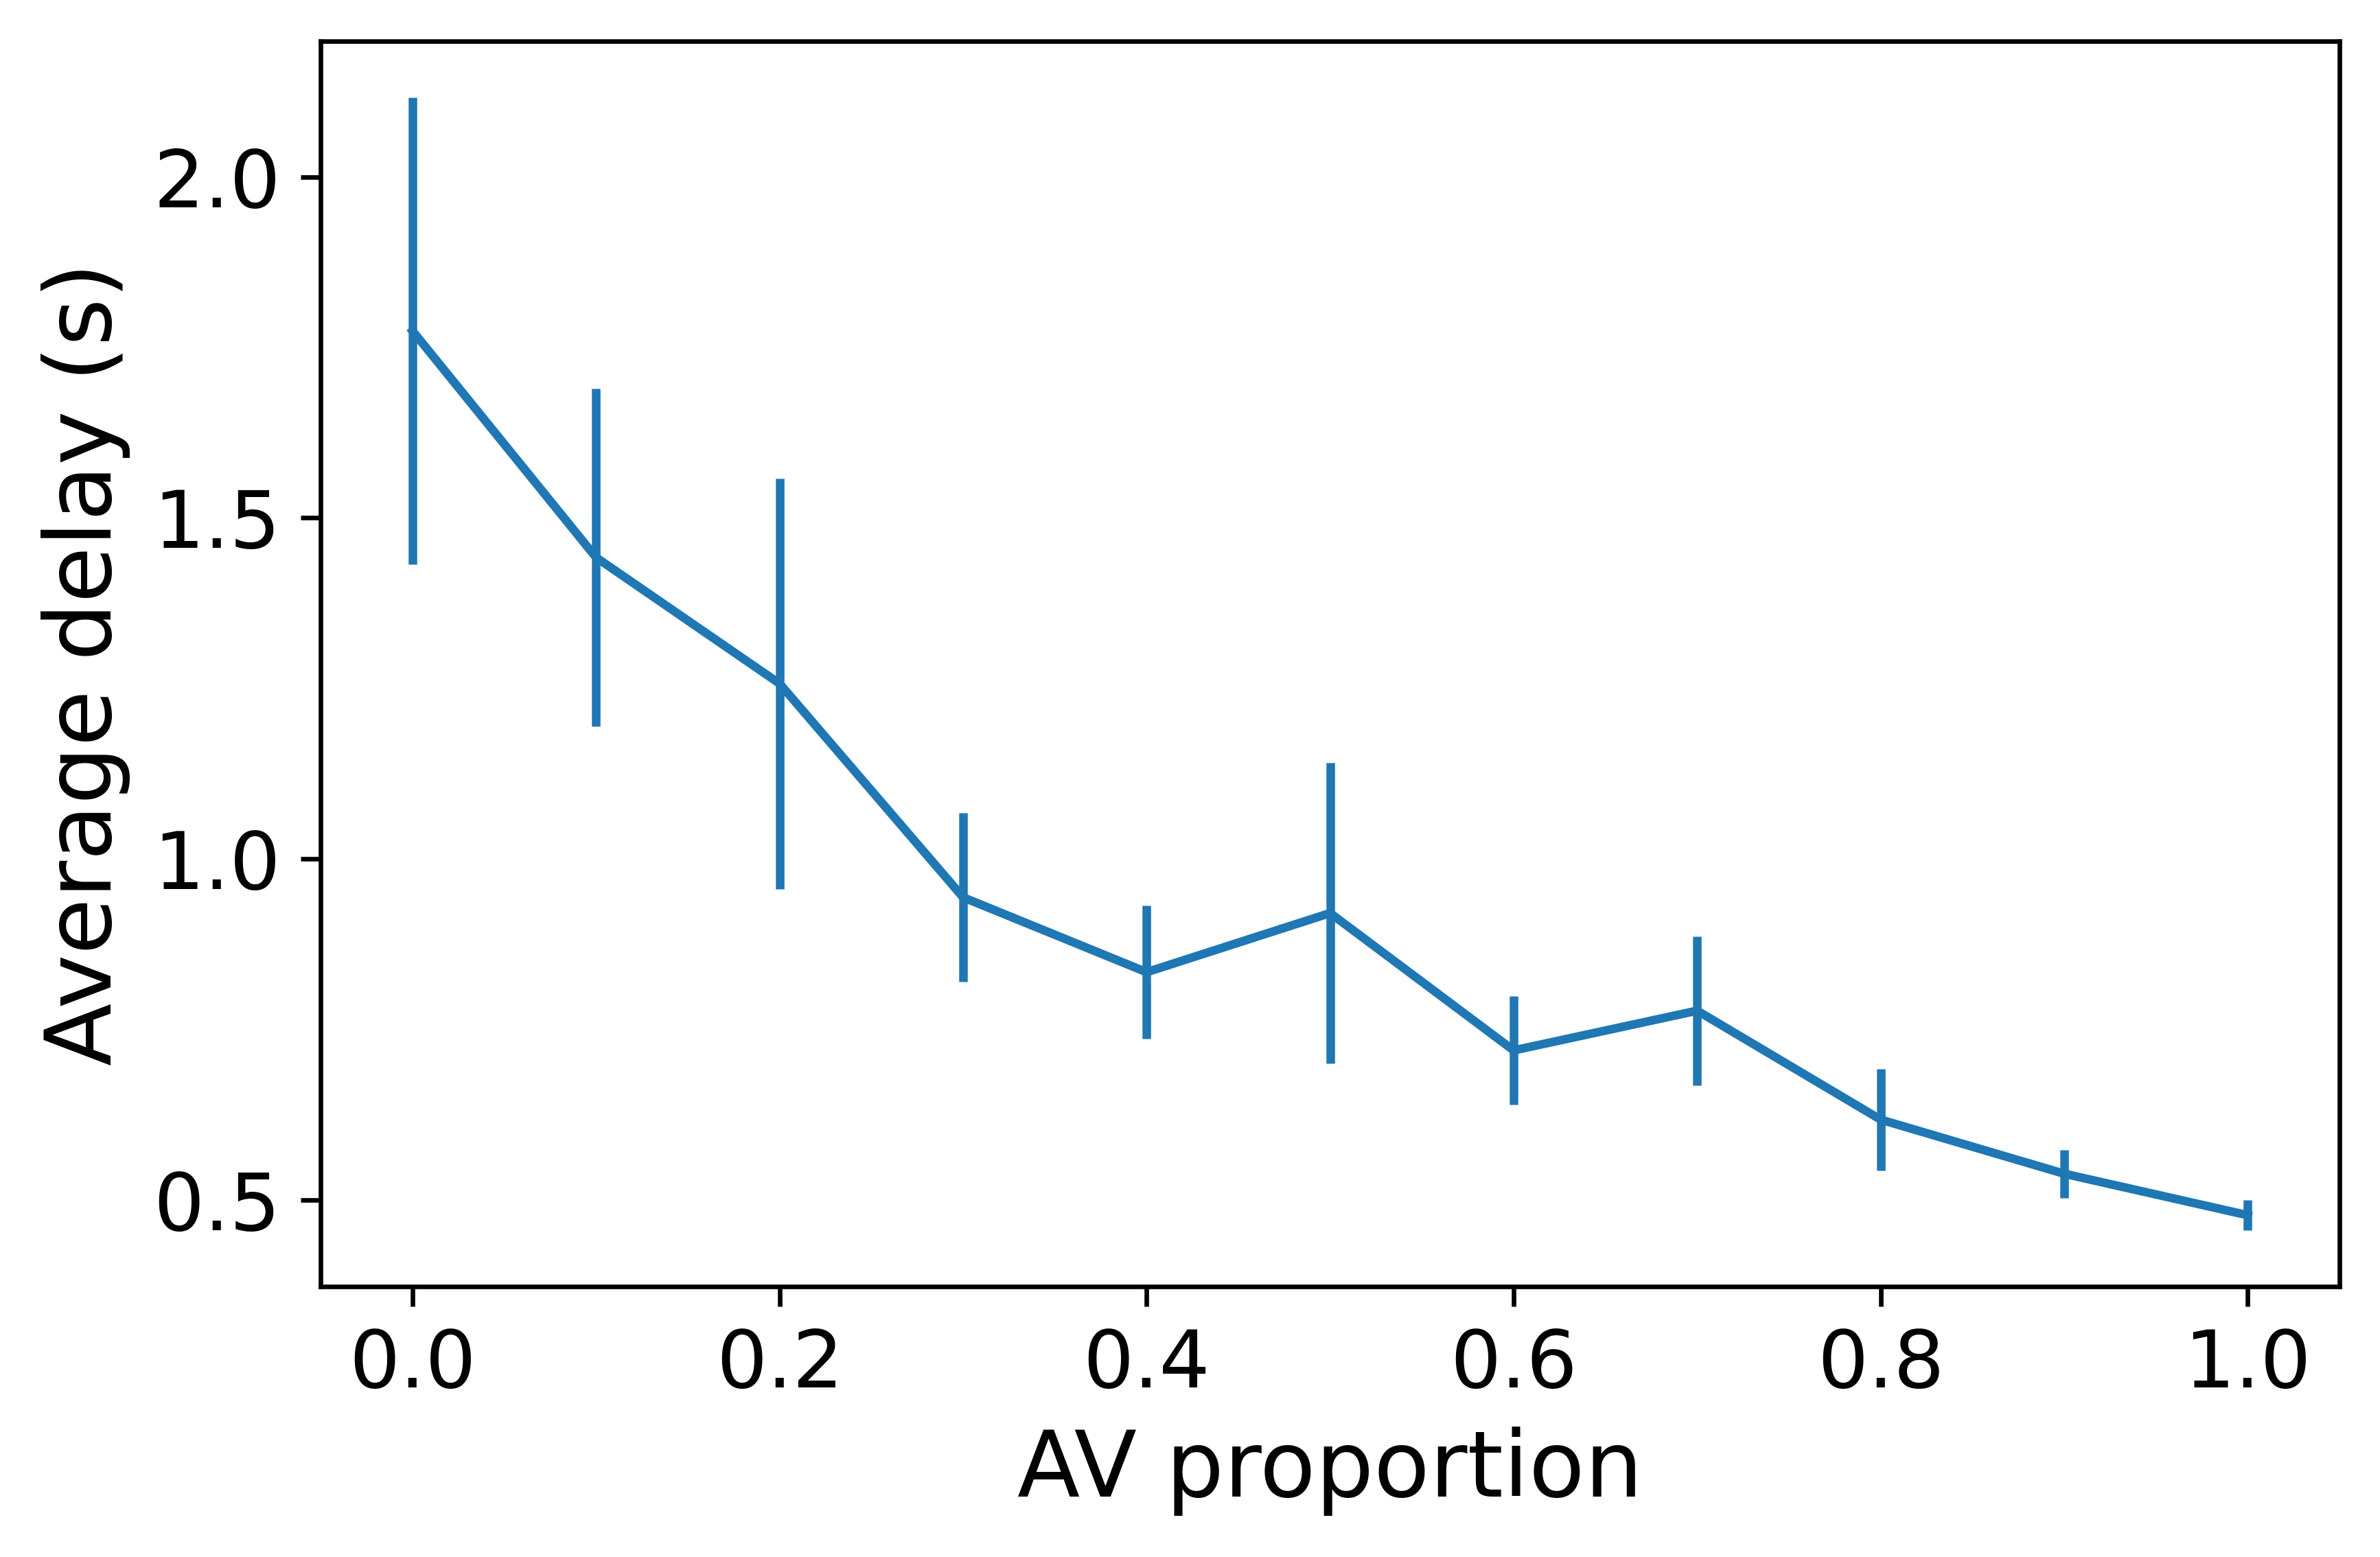

In [3]:
plt.errorbar(df['av_p'], df['delay_mn'], 2*df['delay_sd']/30**.5)
plt.xlabel('AV proportion')
plt.ylabel('Average delay (s)')
plt.tight_layout()
plt.savefig('figs/av_prop.png')
plt.show()

## Misreporting benefit

In [4]:
df = pd.read_csv('trial_data/one_liar.csv', index_col=False)
df.dropna(inplace=True)
df['ratio_95'] = 2*df['cost_ratio_sd']/100**.5
df.head()

,factor,config,mechanism,cost_ratio_mean,cost_ratio_sd,ratio_95
3,0.80,multiple,1st,1.641,2.052,0.4104
4,0.80,multiple,2nd,1.878,2.500,0.5000
5,0.80,multiple,ext,6.192,14.882,2.9764
12,0.85,multiple,1st,1.651,2.080,0.4160
13,0.85,multiple,2nd,1.885,2.542,0.5084


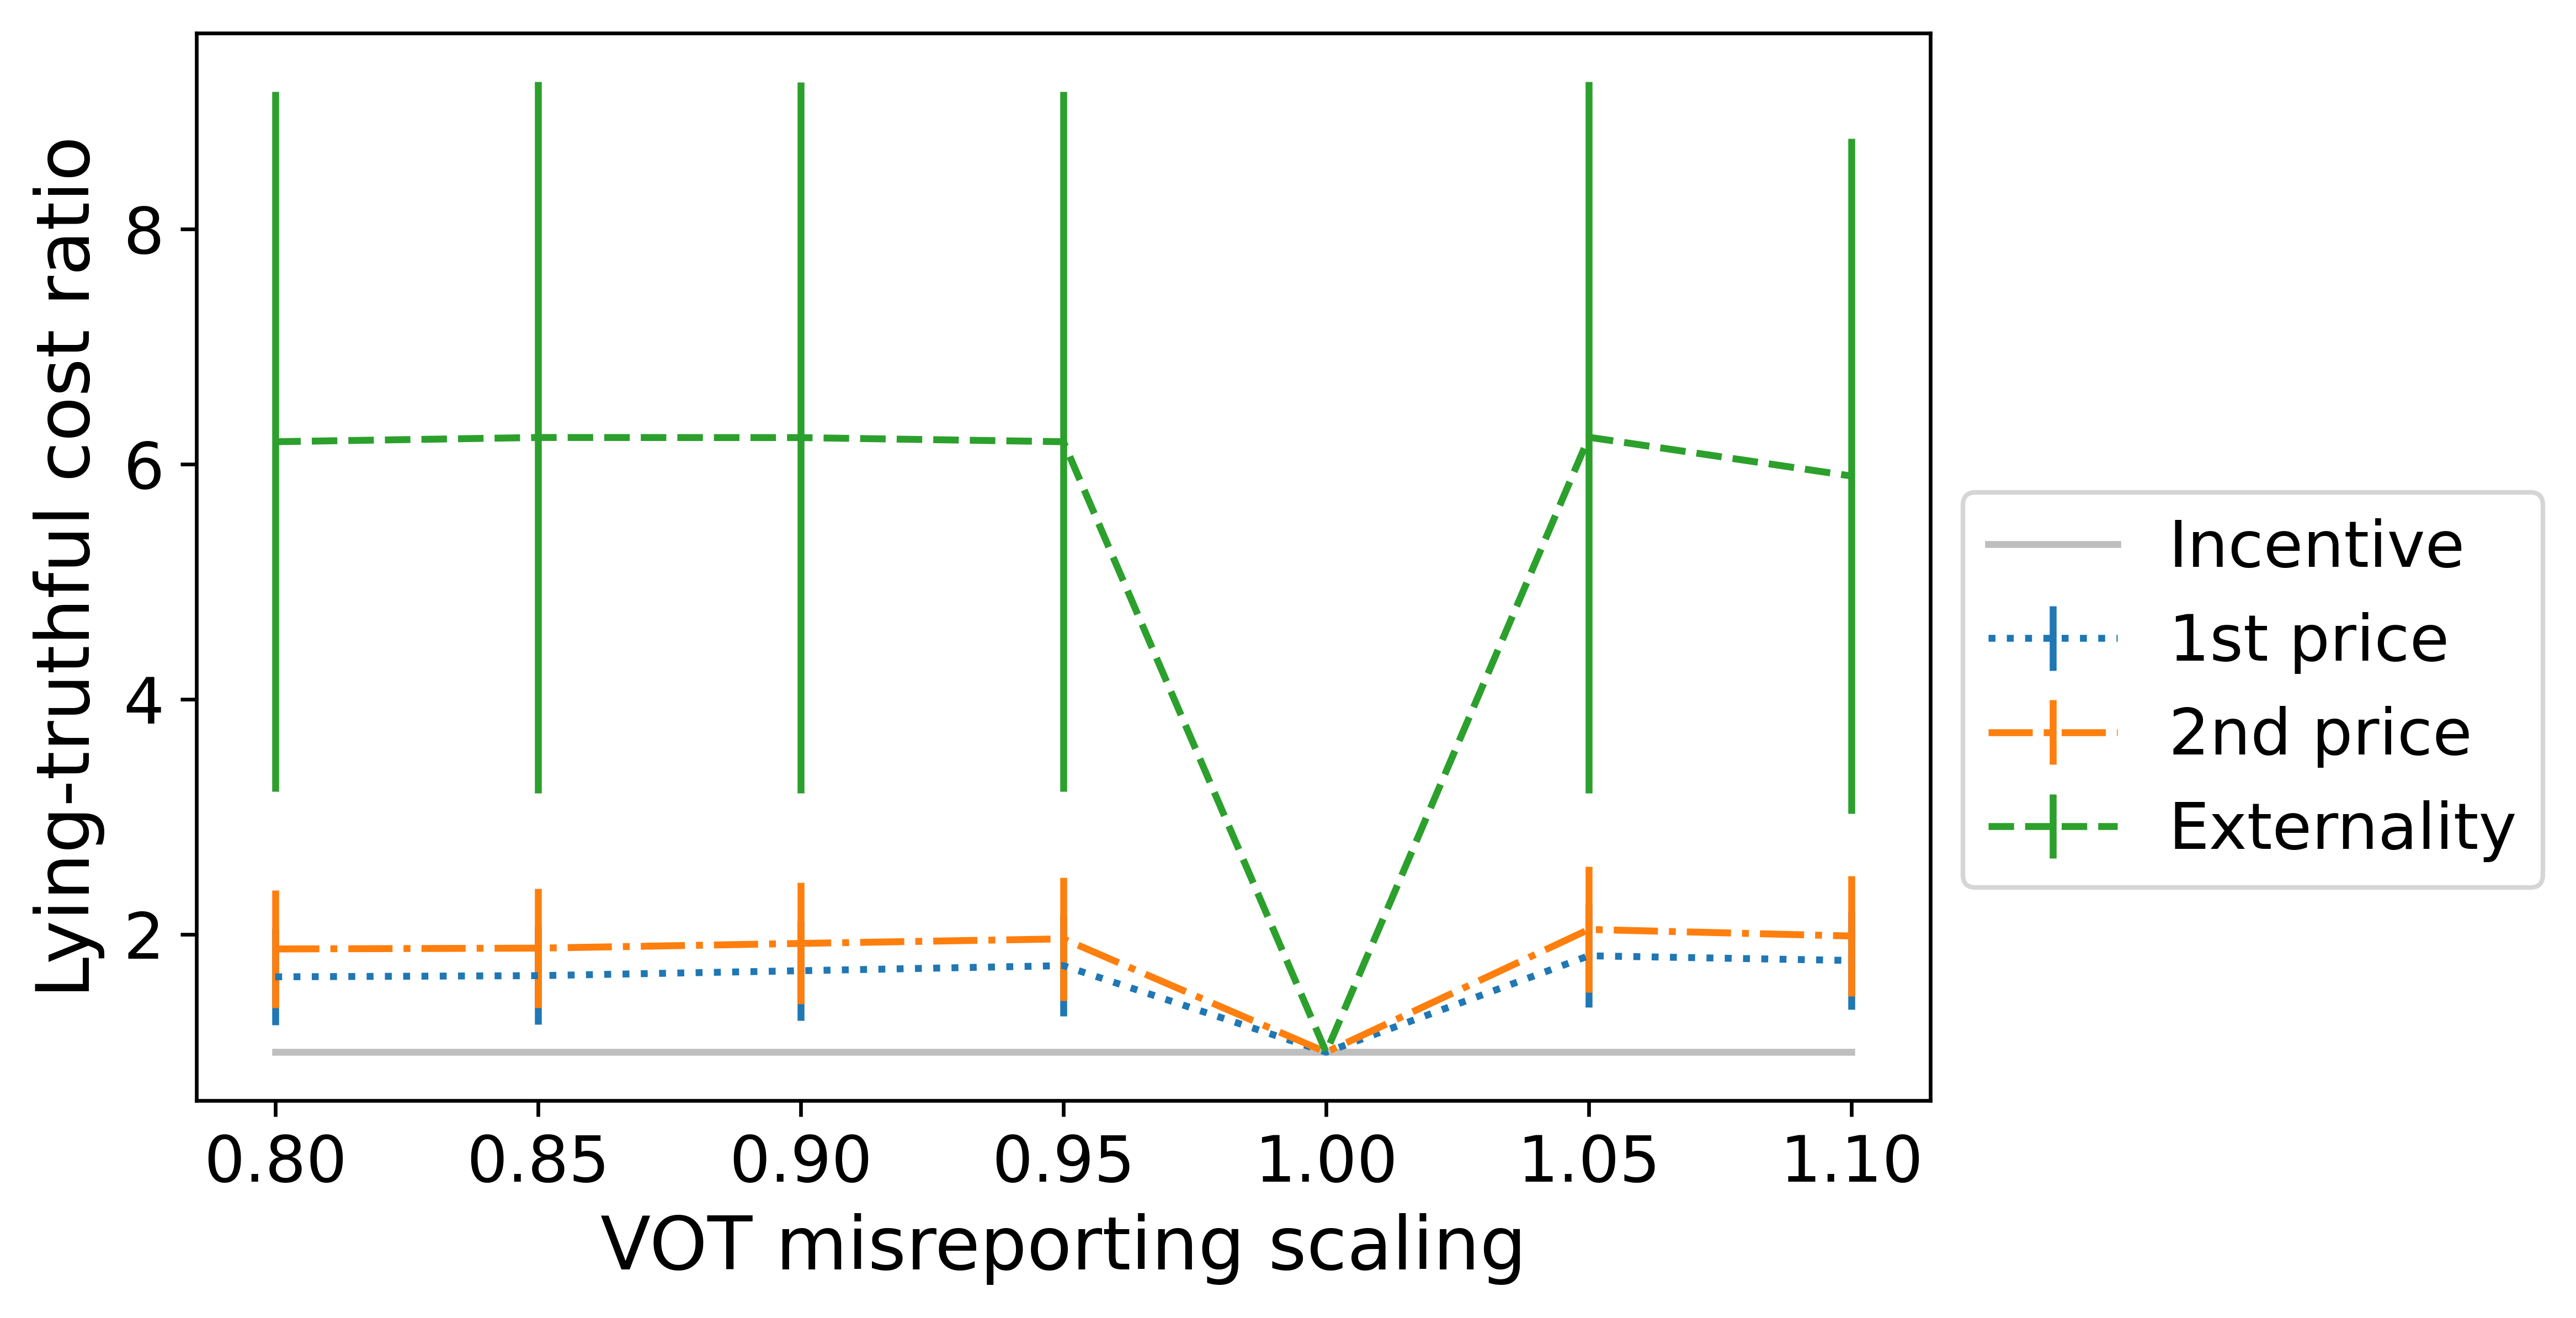

In [5]:
plt.figure(figsize=(8,4.2))
names = {'1st': '1st price',
         '2nd': '2nd price',
         'ext': 'Externality'}
marker = {'1st': ':',
          '2nd': '-.',
          'ext': '--'}
for mechanism in ('1st', '2nd', 'ext'):
    df_subset = df[df['mechanism'] == mechanism]
    plt.errorbar(df_subset['factor'], df_subset['cost_ratio_mean'], df_subset['ratio_95'], linestyle=marker[mechanism], label=names[mechanism])
plt.plot([i/100 for i in range(80, 111, 5)], [1 for _ in range(7)], c='gray', alpha = .5, label='Incentive')
plt.xlabel('VOT misreporting scaling')
plt.ylabel('Lying-truthful cost ratio')
plt.legend(bbox_to_anchor=(1,.6), loc="upper left")
plt.tight_layout()
plt.savefig('figs/vot_misreport.png')
plt.show()

## Delay compared to flow

In [6]:
df = pd.read_csv('trial_data/flow.csv', index_col=False)
df.head()

,vpm,method,mean,sd
0,0.0,det,0.0000,0.00000
1,0.0,signal,0.0000,0.00000
2,0.0,soft,0.0000,0.00000
3,0.0,hard,0.0000,0.00000
4,2.5,det,0.2865,0.04244


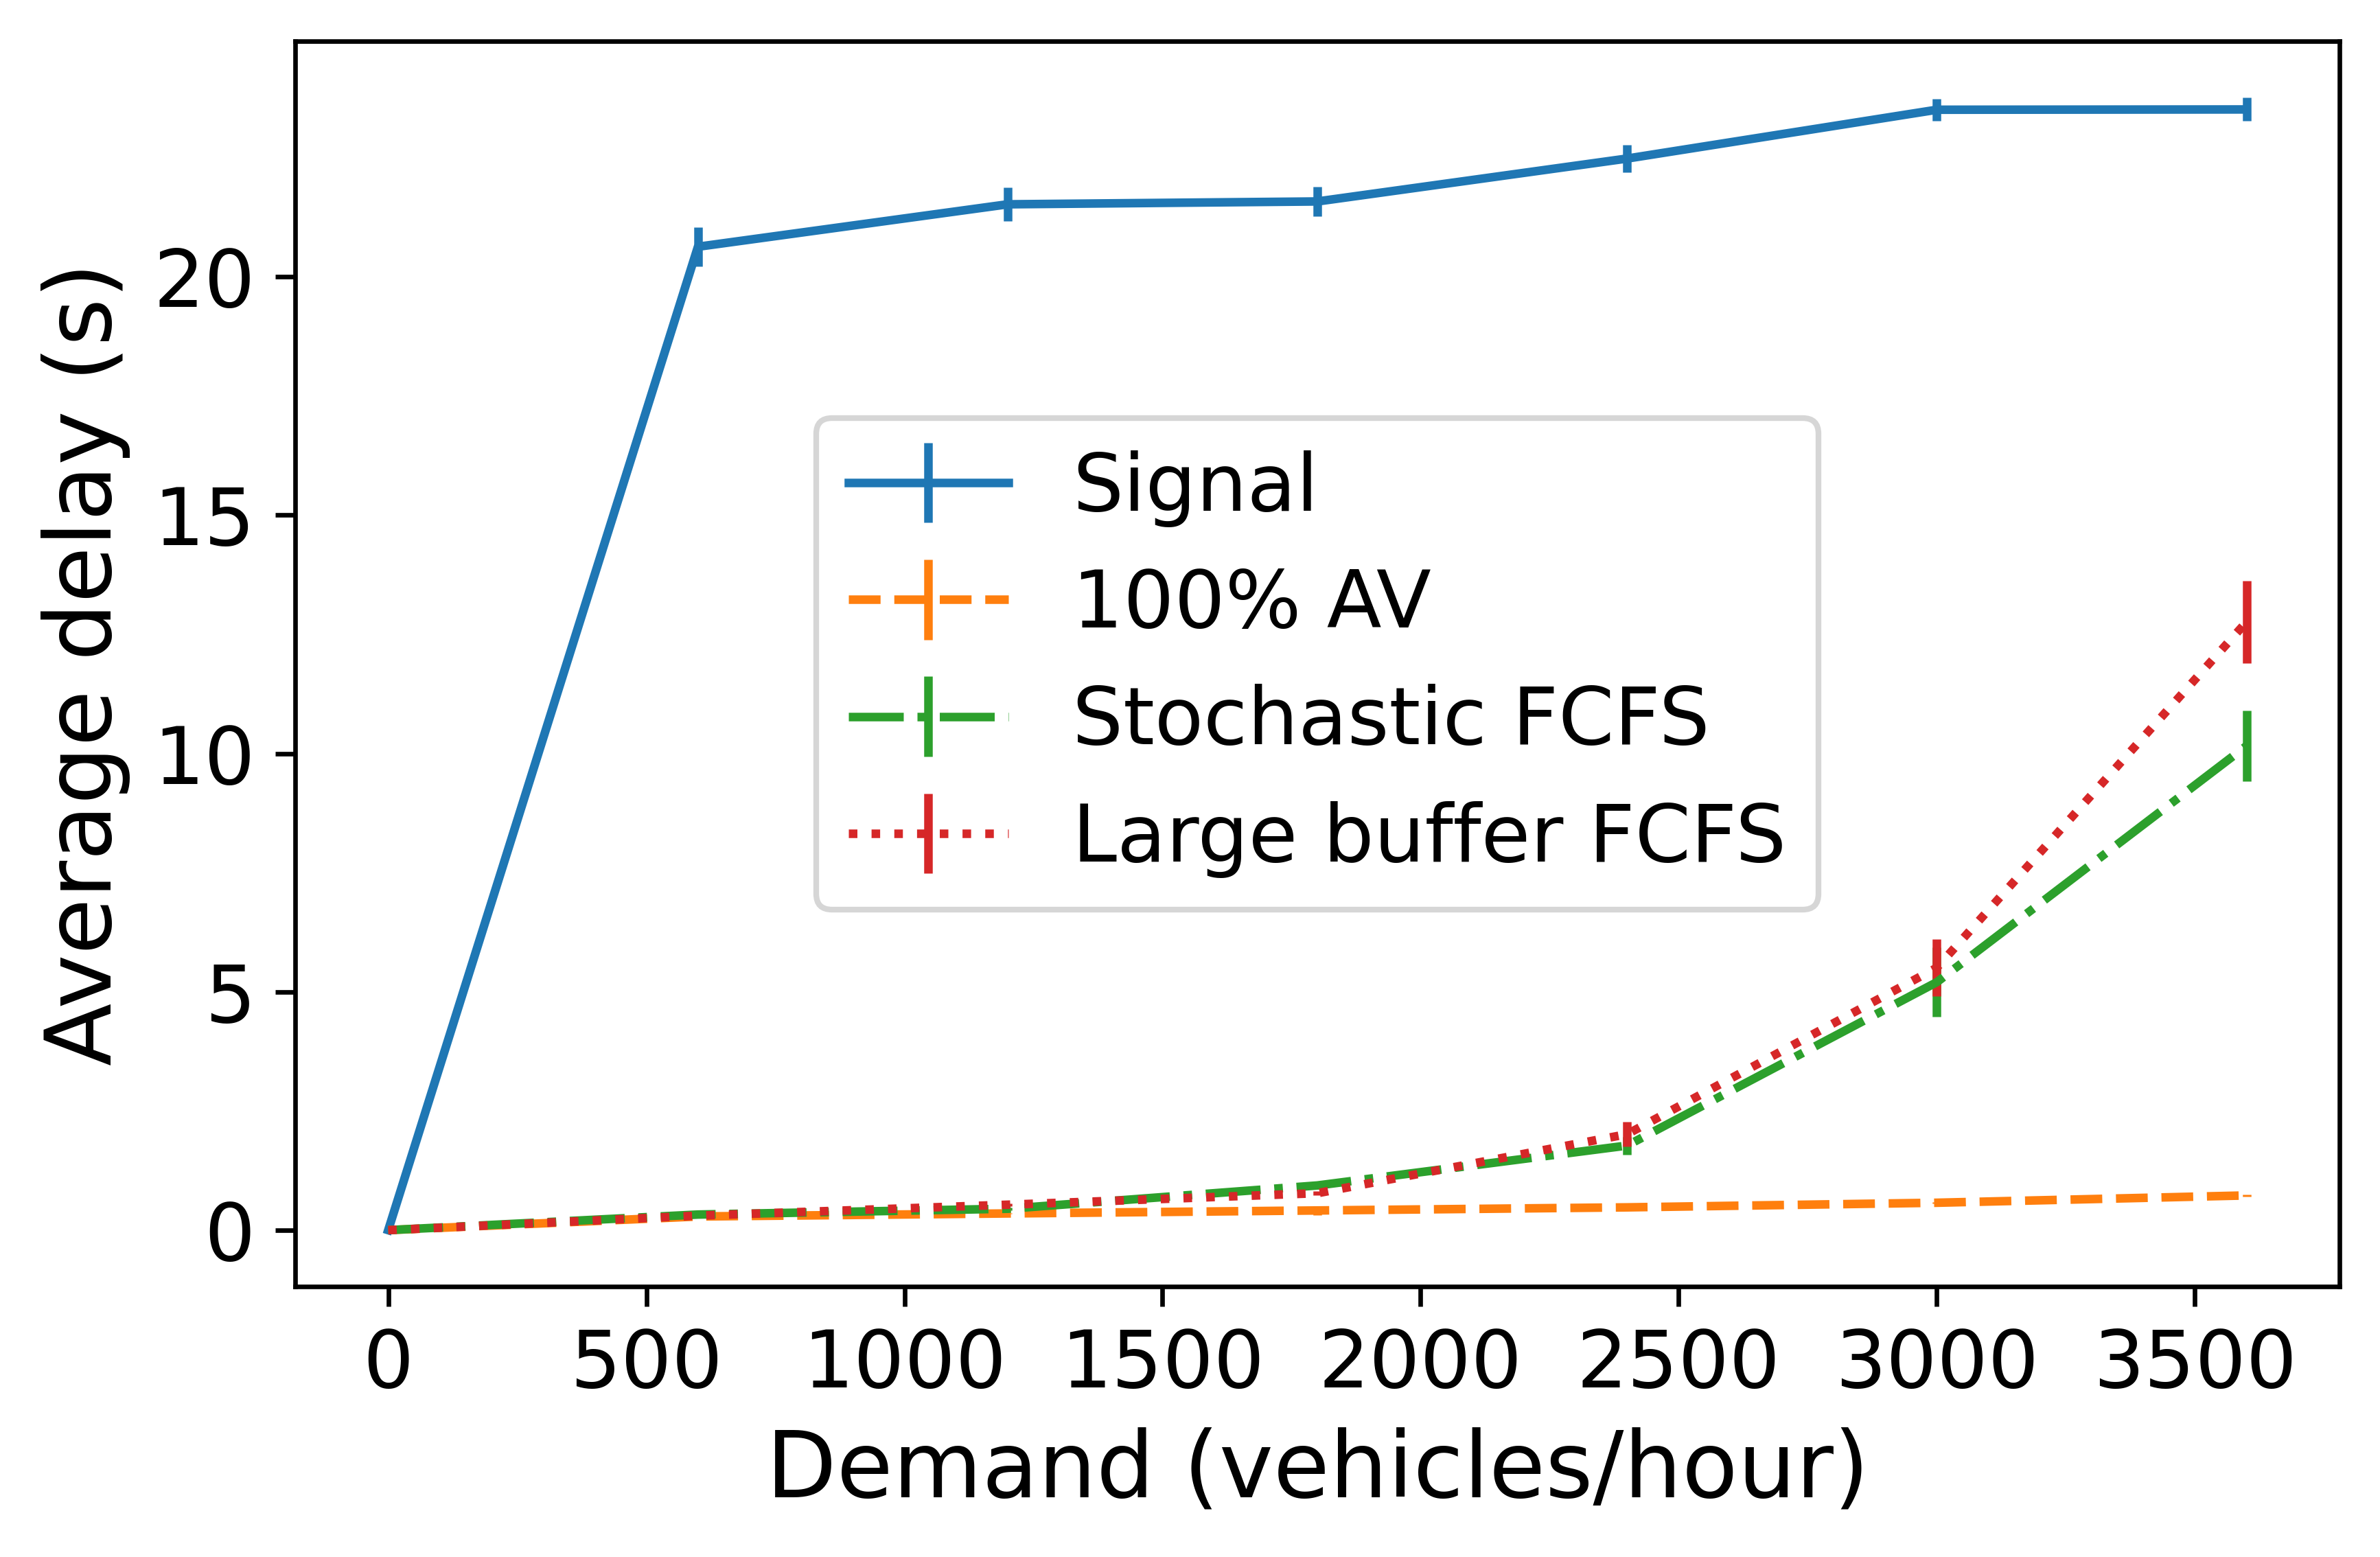

In [7]:
names = {'signal': 'Signal',
         'det': '100% AV',
         'soft': 'Stochastic FCFS',
         'hard': 'Large buffer FCFS'}
marker = {'signal': '-',
          'det': '--',
          'soft': '-.',
          'hard': ':'}
# plt.figure(figsize=(8,4.2))
for method in ('signal', 'det', 'soft', 'hard'):
    df_subset = df[df['method'] == method]
    plt.errorbar(df_subset['vpm']*60*4, df_subset['mean'], 2*df_subset['sd']/100**.5, linestyle=marker[method], label=names[method])
plt.xlabel('Demand (vehicles/hour)')
plt.ylabel('Average delay (s)')
plt.legend()
# plt.legend(bbox_to_anchor=(1,.6), loc="upper left")
plt.tight_layout()
plt.savefig('figs/demand.png')
plt.show()

## Delay as a function of MEV

In [8]:
df = pd.read_csv('trial_data/mev.csv', index_col=False)
df.head()

,mev,delay_mn,delay_sd
0,5.000000e-07,2.447,1.872
1,5.000000e-06,2.653,1.528
2,5.000000e-05,2.231,1.237
3,5.000000e-04,1.745,0.780
4,5.000000e-03,1.434,0.625


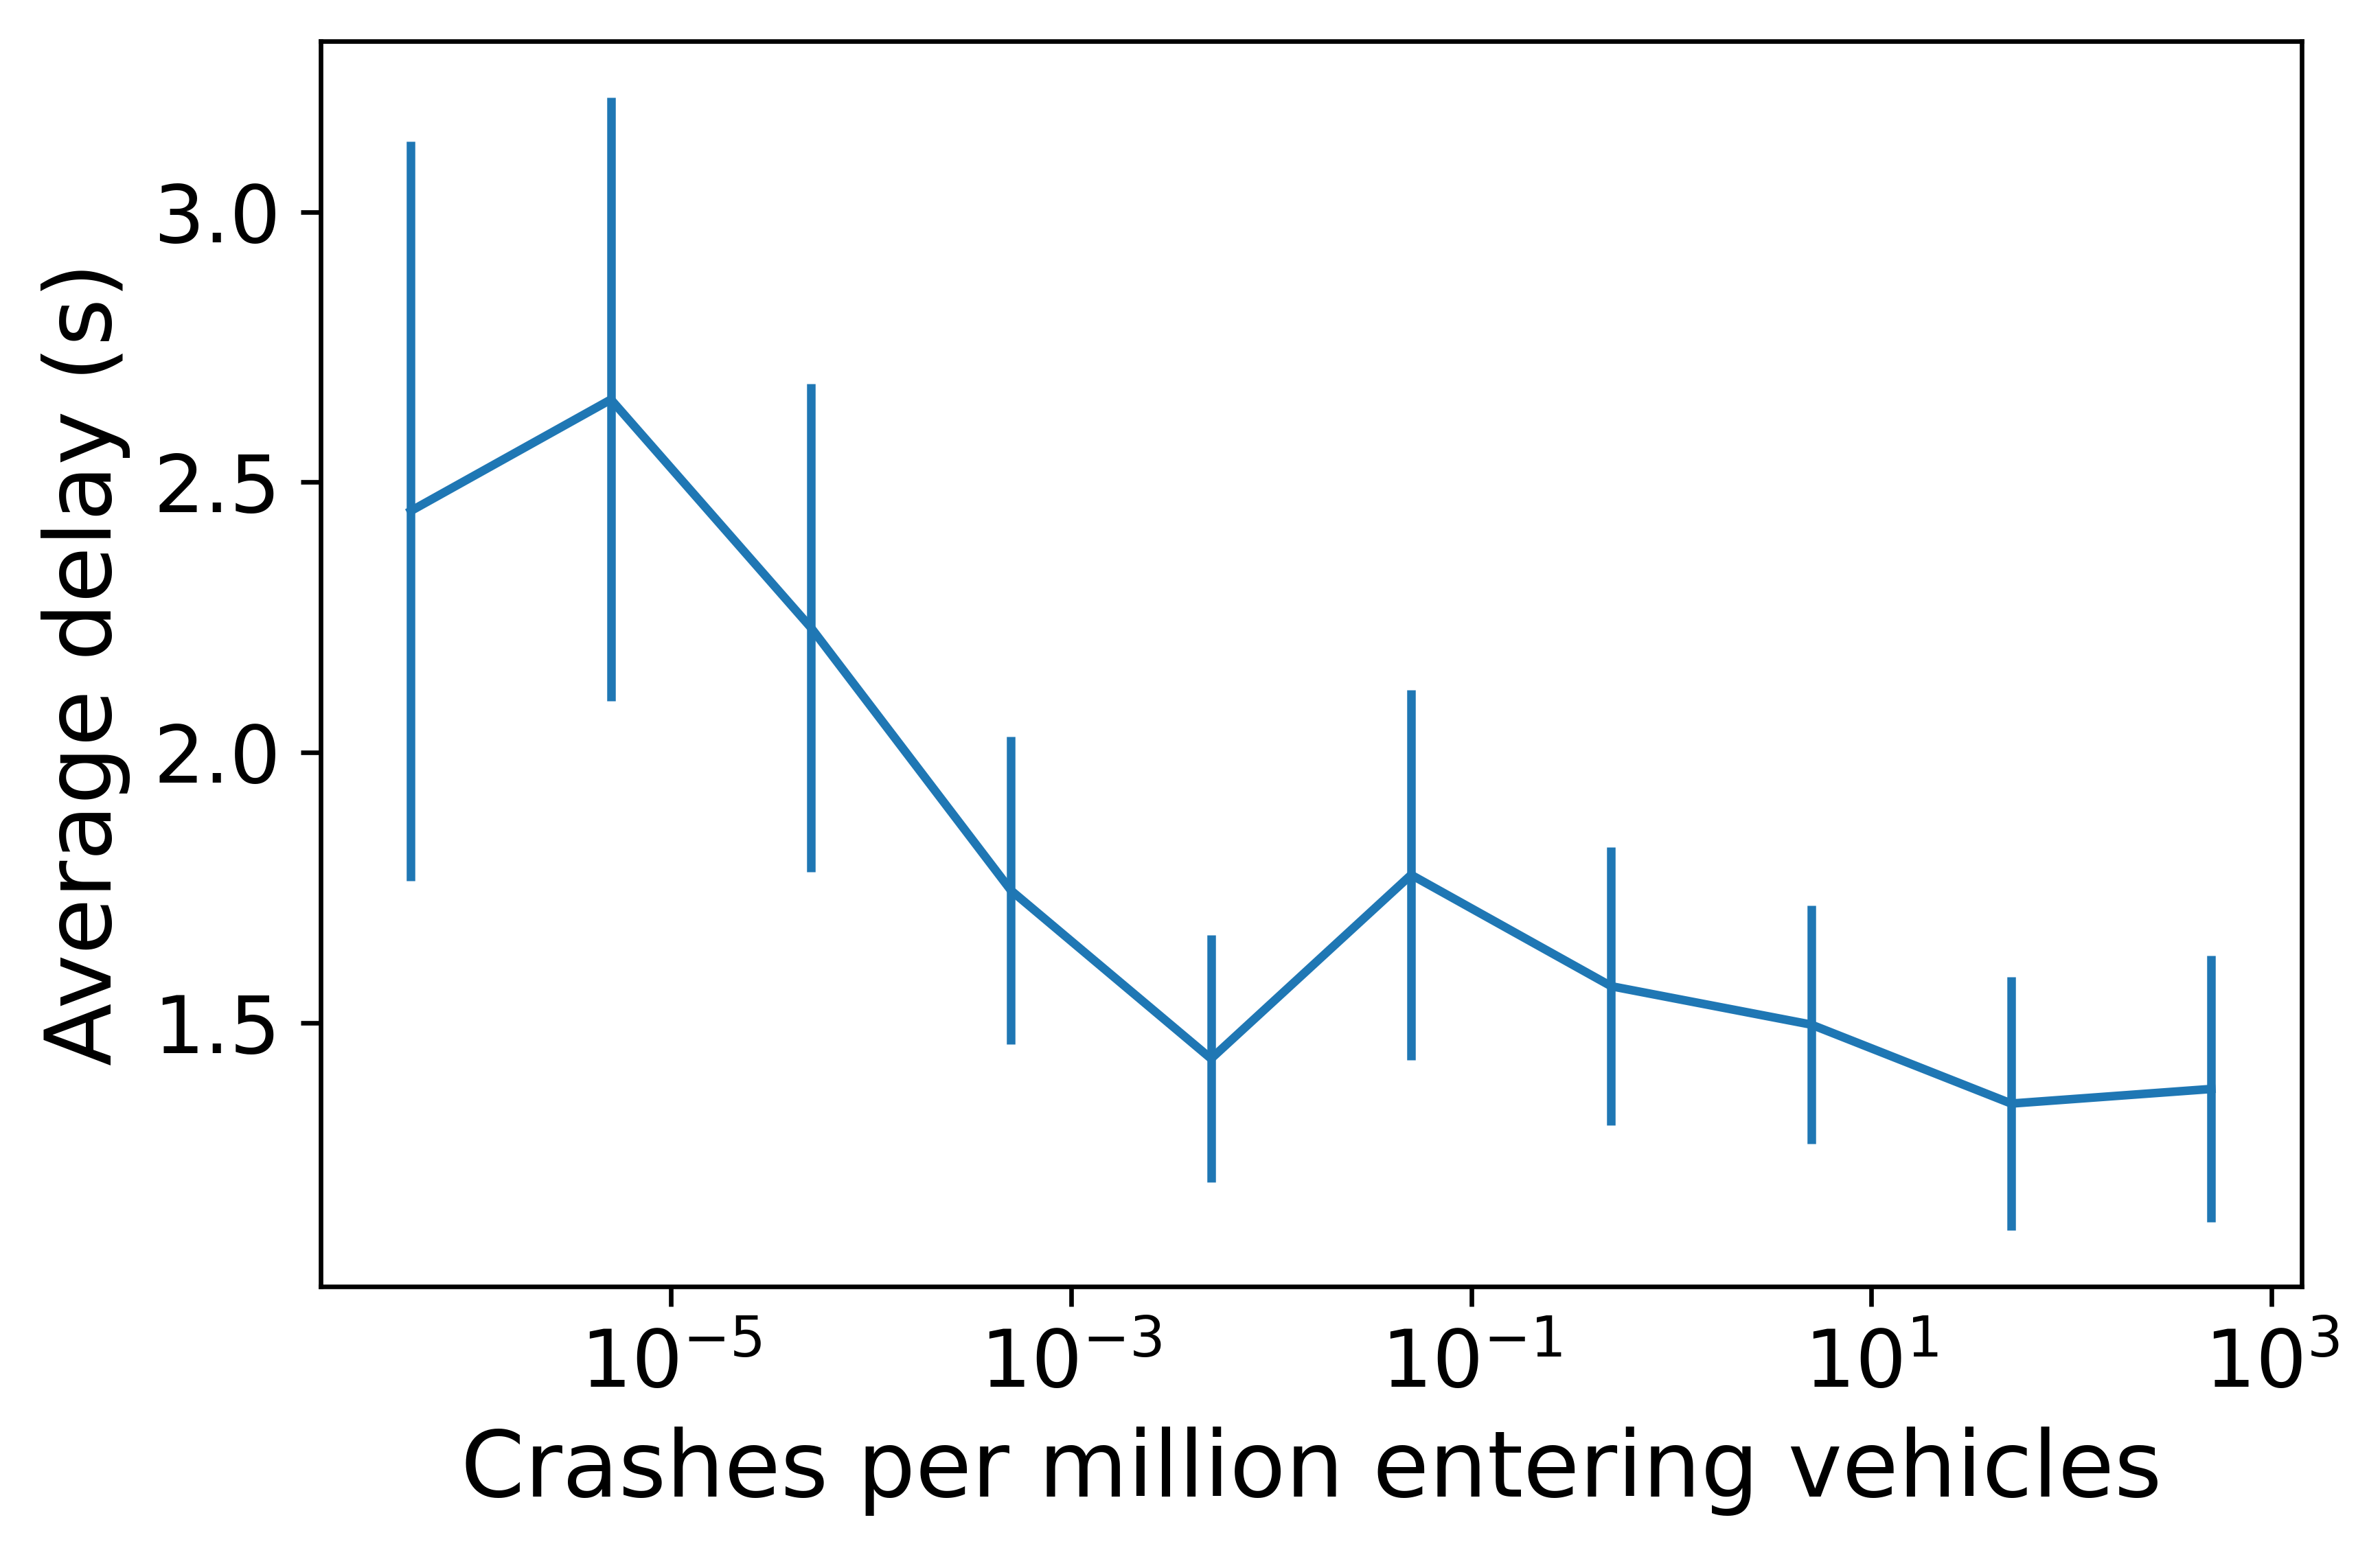

In [9]:
plt.errorbar(df['mev'], df['delay_mn'], 2*df['delay_sd']/30**.5)
plt.xlabel('Crashes per million entering vehicles')
plt.ylabel('Average delay (s)')
plt.xscale('log')
plt.tight_layout()
plt.savefig('figs/mev.png')
plt.show()